In [49]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv('/content/drive/MyDrive/Semester 3/DE Mentee/Task 1 - Dataset - breast_cancer_survival_.csv.csv')

In [51]:
#Number of rows and columns in the dataframe
df.shape

(334, 15)

In [52]:
#Displaying the first 5 rows of the dataframe
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [53]:
#Obtaining the data types and the non-null count of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 334 non-null    int64  
 1   Gender              334 non-null    object 
 2   Protein1            334 non-null    float64
 3   Protein2            334 non-null    float64
 4   Protein3            334 non-null    float64
 5   Protein4            334 non-null    float64
 6   Tumour_Stage        334 non-null    object 
 7   Histology           334 non-null    object 
 8   ER status           334 non-null    object 
 9   PR status           334 non-null    object 
 10  HER2 status         334 non-null    object 
 11  Surgery_type        334 non-null    object 
 12  Date_of_Surgery     334 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      321 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 39.3+ K

In [54]:
#Obtaining basis statistical information about the given data
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900


In [55]:
#Extracting the names of each column
df.columns

Index(['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
       'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status',
       'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [56]:
#Finding the number of duplicate rows
df.duplicated().sum()

0

In [57]:
#finding the number of empty entries for each column
df.isnull().sum()

,0
Age,0
Gender,0
Protein1,0
Protein2,0
Protein3,0
Protein4,0
Tumour_Stage,0
Histology,0
ER status,0
PR status,0


In [58]:
#Obtaining percentage of null values for each column
def null_percentage(df, columns):
  for col in columns:
    null = df[col].isnull().sum()
    total = len(df)
    null_percent = round((null/total)*100, 2)
    print(f'{col}: {null_percent}')
null_percentage(df, df.columns)

Age: 0.0
Gender: 0.0
Protein1: 0.0
Protein2: 0.0
Protein3: 0.0
Protein4: 0.0
Tumour_Stage: 0.0
Histology: 0.0
ER status: 0.0
PR status: 0.0
HER2 status: 0.0
Surgery_type: 0.0
Date_of_Surgery: 0.0
Date_of_Last_Visit: 5.09
Patient_Status: 3.89


In [59]:
#Dropping the rows with null values since null percentage is less than 10
df.dropna(subset=['Date_of_Last_Visit', 'Patient_Status'], axis=0, inplace=True)

In [60]:
#Ensuring that no null values remain
df.isnull().sum()

,0
Age,0
Gender,0
Protein1,0
Protein2,0
Protein3,0
Protein4,0
Tumour_Stage,0
Histology,0
ER status,0
PR status,0


In [61]:
#Changing the data type of the 'Date_of_Surgery' column to datetime
df['Date_of_Surgery']=pd.to_datetime(df['Date_of_Surgery'], format='%d-%b-%y')

In [62]:
#Changing the data type of the 'Date_of_Last_Visit' column to datetime
df['Date_of_Last_Visit']=pd.to_datetime(df['Date_of_Last_Visit'], format='%d-%b-%y')

In [63]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2018-05-20,2018-08-26,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2018-04-26,2019-01-25,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,2018-08-24,2020-04-08,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2018-11-16,2020-07-28,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,2018-12-12,2019-01-05,Alive


In [64]:
count=(df['Protein1']<0).sum()
print(f'Protein1: {count}')

Protein1: 154


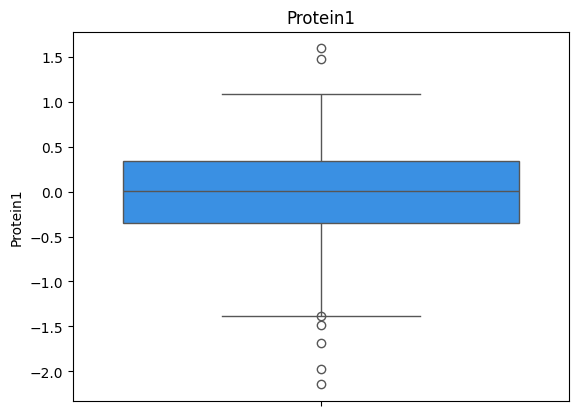

In [65]:
#Looking for outliers in the data
sns.boxplot(data=df, y='Protein1', color='dodgerblue').set(title='Protein1')
plt.show()

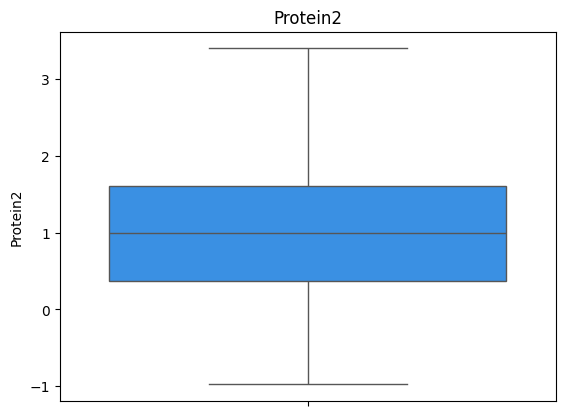

In [66]:
sns.boxplot(data=df, y='Protein2', color='dodgerblue').set(title='Protein2')
plt.show()

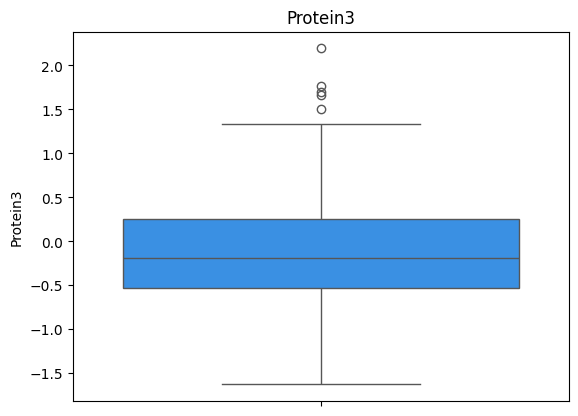

In [67]:
sns.boxplot(data=df, y='Protein3', color='dodgerblue').set(title='Protein3')
plt.show()

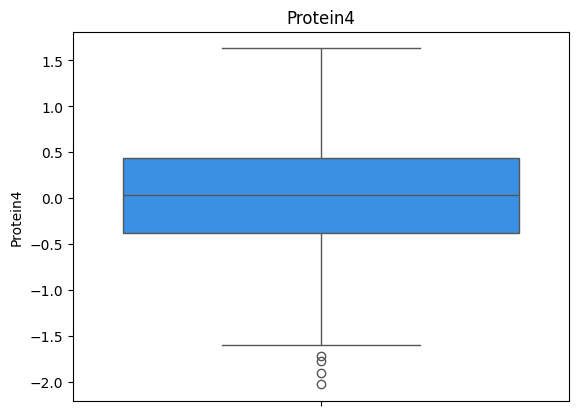

In [68]:
sns.boxplot(data=df, y='Protein4', color='dodgerblue').set(title='Protein4')
plt.show()

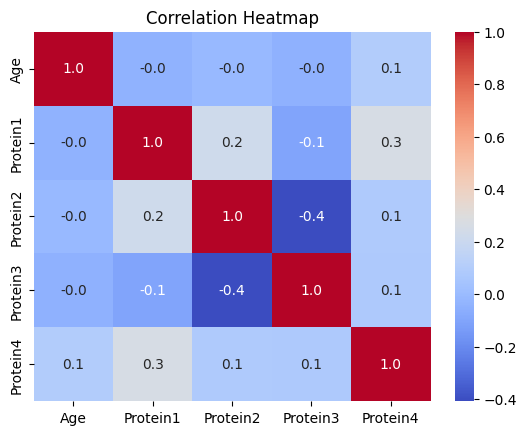

In [69]:
#Obtaining the correlation between all the columns
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.1f', cmap='coolwarm').set(title='Correlation Heatmap')
plt.show()

In [70]:
#Through this heatmap, it can be seen that none of the attributes have a very strong correlation.

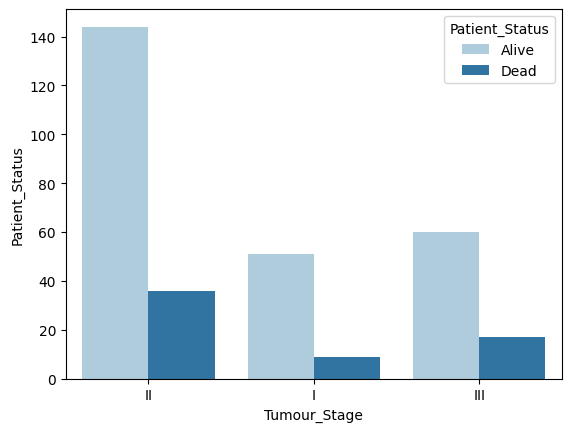

In [71]:
sns.countplot(x='Tumour_Stage', data=df, hue='Patient_Status', palette='Paired')
plt.title('')
plt.xlabel('Tumour_Stage')
plt.ylabel('Patient_Status')
plt.show()

In [72]:
#This countplot shows that most cases are in the second tumour stage. The third tumour stage has fewer cases and the first tumour stage has the fewest number of cases.

In [73]:
dist_histology = df['Histology'].value_counts()

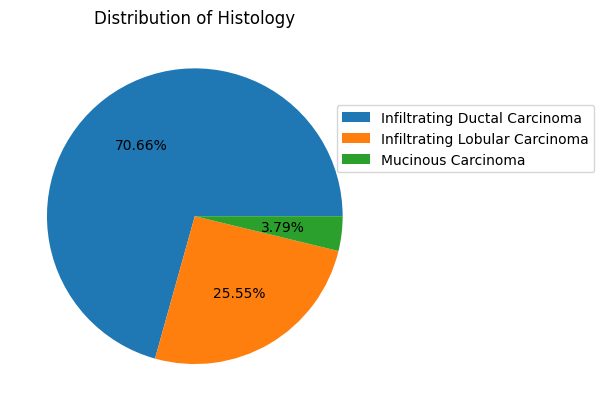

In [74]:
plt.pie(dist_histology, autopct='%.2f%%')
plt.legend(labels=['Infiltrating Ductal Carcinoma','Infiltrating Lobular Carcinoma', 'Mucinous Carcinoma'], loc='lower right', bbox_to_anchor=(1.6, 0.6))
plt.title('Distribution of Histology')
plt.show()

In [75]:
#Through this pie chart, it can be seen that a majority of the cases are from 'Infiltrating Ductal Carcinoma'. 'Mucinous Carcinoma' has the least number of cases in this dataset.

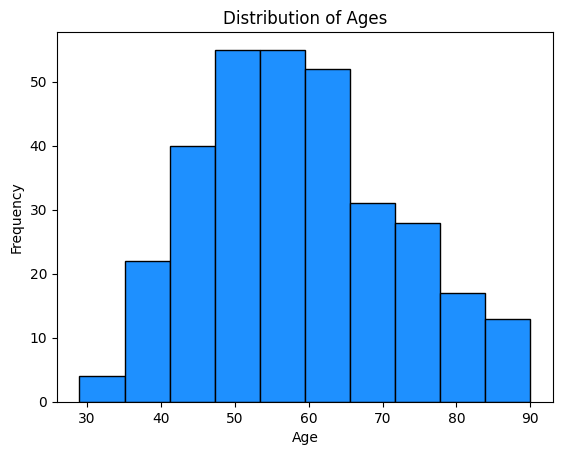

In [76]:
plt.hist(df['Age'], edgecolor='black', color='dodgerblue') # notice how we are binning data here
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [77]:
#This histogram shows that patients whose ages lie between 50-65 have the highest frequency.
#Patients in their early thirties are the fewest.
#The number of cases decreases as the age increases above 70.